### Download Flowers dataset

In [ ]:
#You can download the data manually as well instead of using 'wget'
!wget http://download.tensorflow.org/example_images/flower_photos.tgz --quiet

In [ ]:
!ls -l

total 993332
drwxr-x--- 7 270850 5000      4096 Feb 10  2016 flower_photos
-rw-r--r-- 1 root   root 235694080 Feb 10  2016 flower_photos.tar
-rw-r--r-- 1 root   root 228813984 Feb 10  2016 flower_photos.tgz
-rw-r--r-- 1 root   root 228813984 Feb 10  2016 flower_photos.tgz.1
-rw-r--r-- 1 root   root 228813984 Feb 10  2016 flower_photos.tgz.2
-rw-r--r-- 1 root   root  95020424 Jul 14 05:48 flowers_cnn.h5
drwxr-xr-x 1 root   root      4096 Jul 11 13:22 sample_data


In [ ]:
#Unzip the data
!tar -xf flower_photos.tgz

In [ ]:
# prompt: how to unzip file for windows

# Install 7zip for Windows
!choco install 7zip.install -y

# Unzip the file using 7zip
!7z x flower_photos.tgz


/bin/bash: line 1: choco: command not found

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 228813984 bytes (219 MiB)

Extracting archive: flower_photos.tgz
--
Path = flower_photos.tgz
Type = gzip
Headers Size = 10


Would you like to replace the existing file:
  Path:     ./flower_photos.tar
  Size:     235694080 bytes (225 MiB)
  Modified: 2016-02-10 20:53:41
with the file from archive:
  Path:     flower_photos.tar
  Size:     235694080 bytes (225 MiB)
  Modified: 2016-02-10 20:53:41
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 

In [ ]:
#Check how data is organized
!ls -l flower_photos

total 624
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  49152 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  40960 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  36864 Feb 10  2016 tulips


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import to_categorical

### Load the data and do train test split


In [ ]:
# Define the path to the extracted dataset directory
dataset_dir = 'flower_photos'
# Define image size (resize)
image_size = (224, 224)

# Initialize lists to hold images and labels
images = []
labels = []

# Loop through each subdirectory in the dataset directory
for label in os.listdir(dataset_dir):
    label_path = os.path.join(dataset_dir, label)
    if os.path.isdir(label_path):
        # Loop through each image in the subdirectory
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            try:
                # Load image using OpenCV
                image = cv2.imread(image_path)
                if image is not None:
                    # Resize image
                    image = cv2.resize(image, image_size)
                    # Append image and label to lists
                    images.append(image)
                    labels.append(label)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

In [ ]:

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode the labels as integers
label_to_index = {label: index for index, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])

# One-hot encode labels
num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Training set images shape:", X_train.shape)
print("Training set labels shape:", y_train.shape)
print("Test set images shape:", X_test.shape)
print("Test set labels shape:", y_test.shape)

Training set images shape: (2936, 224, 224, 3)
Training set labels shape: (2936, 5)
Test set images shape: (734, 224, 224, 3)
Test set labels shape: (734, 5)


### Use batch generator (Image data generators)

In [ ]:
#Define some parameters
img_size = 224
img_depth = 3

In [ ]:
def normalize_data(img):

  # Normalization for resnet 50
  return tf.keras.applications.resnet50.preprocess_input(img)


Create an ImageDataGenerator object, it can also split data between train and test.

In [ ]:
#ImageDataGenerator declaration with 20% data as test (80% for training) also perform scaling in images
datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                           zoom_range=0.2,
                           rotation_range=20,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           preprocessing_function=normalize_data,
                          validation_split=0.2)

ImageDataGenerator can read images directory and also resize them if needed

In [ ]:
#Build training generator.
train_gen=datagen.flow_from_directory(directory='flower_photos',
                                      target_size=(img_size,img_size),
                                      batch_size=64,
                                      class_mode='categorical',
                                      subset='training')

#Build test generator
test_gen=datagen.flow_from_directory(directory='flower_photos',
                                     target_size=(img_size,img_size),
                                     batch_size=64,
                                     class_mode='categorical',
                                     subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
(X,y)=train_gen.next()
print(X.shape)
print(y.shape)

(64, 224, 224, 3)
(64, 5)


ImageDataGenerator returns 64 images and their labels

### Build CNN Model

In [ ]:
model=Sequential()
model.add(Conv2D(filters= 200,
                 input_shape=(img_size,img_size,3),
                 kernel_size=(3,3),
                 padding = 'same',
                 activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(150,kernel_size=(3,3),activation='relu', padding = 'same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(100,kernel_size=(3,3),activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu', padding = 'same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu', padding = 'same'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 60, 60, 200)       5600      
                                                                 
 batch_normalization_8 (Bat  (None, 60, 60, 200)       800       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 200)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 150)       270150    
                                                                 
 dropout_10 (Dropout)        (None, 30, 30, 150)       0         
                                                                 
 batch_normalization_9 (Bat  (None, 30, 30, 150)      

### Train the model

In [ ]:
# callbacks
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_cnn.h5',
                                                    save_best_only=True,
                                                    monitor='val_accuracy',
                                                    mode='max',
                                                    verbose=1)

In [ ]:
history=model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=64,
          validation_data=[X_test,y_test],
          callbacks=[model_checkpoint])

Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 1.3771 - accuracy: 0.4240
Epoch 1: val_accuracy improved from -inf to 0.31880, saving model to flowers_cnn.h5
46/46 [==============================] - 7s 86ms/step - loss: 1.3771 - accuracy: 0.4240 - val_loss: 3.5805 - val_accuracy: 0.3188
Epoch 2/10
 1/46 [..............................] - ETA: 2s - loss: 1.1061 - accuracy: 0.4375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - ETA: 0s - loss: 1.0553 - accuracy: 0.5688
Epoch 2: val_accuracy improved from 0.31880 to 0.33106, saving model to flowers_cnn.h5
46/46 [==============================] - 4s 78ms/step - loss: 1.0553 - accuracy: 0.5688 - val_loss: 1.8499 - val_accuracy: 0.3311
Epoch 3/10
46/46 [==============================] - ETA: 0s - loss: 0.9314 - accuracy: 0.6376
Epoch 3: val_accuracy improved from 0.33106 to 0.55722, saving model to flowers_cnn.h5
46/46 [==============================] - 3s 75ms/step - loss: 0.9314 - accuracy: 0.6376 - val_loss: 1.0503 - val_accuracy: 0.5572
Epoch 4/10
46/46 [==============================] - ETA: 0s - loss: 0.8510 - accuracy: 0.6754
Epoch 4: val_accuracy improved from 0.55722 to 0.63079, saving model to flowers_cnn.h5
46/46 [==============================] - 4s 79ms/step - loss: 0.8510 - accuracy: 0.6754 - val_loss: 0.9385 - val_accuracy: 0.6308
Epoch 5/10
46/46 [==============================] - ETA: 0s - loss: 0.7958 - a

In [ ]:
model.fit(train_gen,
         epochs=200,
         steps_per_epoch= 2939//64,  #Number of training images//batch_size
         validation_data=test_gen,
         validation_steps = 731//64, #Number of test images//batch_size
         callbacks = [model_checkpoint])

Epoch 1/200
45/45 [==============================] - ETA: 0s - loss: 1.1678 - accuracy: 0.5548
Epoch 1: val_accuracy did not improve from 0.68120
45/45 [==============================] - 12s 251ms/step - loss: 1.1678 - accuracy: 0.5548 - val_loss: 2.7139 - val_accuracy: 0.2457
Epoch 2/200
45/45 [==============================] - ETA: 0s - loss: 0.9179 - accuracy: 0.6348
Epoch 2: val_accuracy did not improve from 0.68120
45/45 [==============================] - 11s 253ms/step - loss: 0.9179 - accuracy: 0.6348 - val_loss: 3.1879 - val_accuracy: 0.2457
Epoch 3/200
45/45 [==============================] - ETA: 0s - loss: 0.8469 - accuracy: 0.6817
Epoch 3: val_accuracy did not improve from 0.68120
45/45 [==============================] - 12s 265ms/step - loss: 0.8469 - accuracy: 0.6817 - val_loss: 2.6679 - val_accuracy: 0.2415
Epoch 4/200
45/45 [==============================] - ETA: 0s - loss: 0.8182 - accuracy: 0.6890
Epoch 4: val_accuracy did not improve from 0.68120
45/45 [=============

In [ ]:
#model.fit_generator(train_generator,
#                    epochs=300,
#                    initial_epoch=200,
#                    steps_per_epoch= 2939//64,  #Number of training images//batch_size
#                    validation_data=test_generator,
#                    validation_steps = 731//64, #Number of test images//batch_size
#                    callbacks = [model_checkpoint])

## Predict from test data

In [ ]:
!ls -l

total 230068
drwxr-x--- 7 270850 5000      4096 Feb 10  2016 flower_photos
-rw-r--r-- 1 root   root 228813984 Feb 10  2016 flower_photos.tgz
-rw-r--r-- 1 root   root   6763632 Jul 11 06:45 flowers_cnn.h5
drwxr-xr-x 1 root   root      4096 Jul  9 13:21 sample_data


In [ ]:
#!ls flower_photos/dandelion/

In [ ]:
img = tf.keras.preprocessing.image.load_img('flower_photos/dandelion/8759118120_9eac064e38_n.jpg')

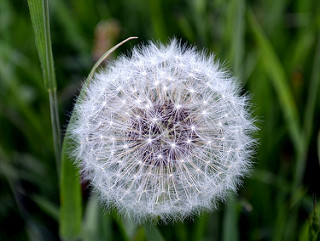

In [ ]:
img

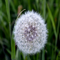

In [ ]:
img_resize = img.resize((60,60))
img_resize

In [ ]:
#Numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img_resize)

In [ ]:
img_array.shape

(60, 60, 3)

In [ ]:
prediction = model.predict(tf.expand_dims(img_array, axis=0))

1/1 [==============================] - 0s 231ms/step


In [ ]:
prediction

array([[0.01891163, 0.8796285 , 0.06169306, 0.00567175, 0.0340951 ]],
      dtype=float32)

In [ ]:
np.argmax(prediction)

1

In [ ]:
train_generator.class_indices

NameError: name 'train_generator' is not defined

**Transfer Learning**

In [ ]:
# Loading the pretrained model
res_model=tf.keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(img_size,img_size,img_depth))

In [ ]:
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
len(res_model.layers)

175

In [ ]:
# freez the layers
for layer in res_model.layers:
  layer.trainable=False

In [ ]:
res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# after freezing the model as it's trainable parameters are zero

In [ ]:
# Add Output Layer
x1 = res_model.output
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1) #To flatten final output and reduce number of weights and bias. Flatten will not reduce final weights and bias.
# Flatten will make final output as 2x2x2048
# GlobalAveragePooling2D will make final out put of dimension 1x2048. It will take average of each feature map of 2x2 for all 2048 feature maps
Output = tf.keras.layers.Dense(5, activation='softmax')(x2) #functional API

In [ ]:
final_model=tf.keras.models.Model(inputs=res_model.input,#pre-trained model input as input layer
                                  outputs=Output)#output layer added

In [ ]:
# complie
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# callbacks
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_cnn.h5',
                                                    save_best_only=True,
                                                    monitor='val_accuracy',
                                                    mode='max',
                                                    verbose=1)

In [ ]:
final_model.fit(train_gen,
         epochs=10,
         steps_per_epoch= 2939//64,  #Number of training images//batch_size
         validation_data=test_gen,
         validation_steps = 731//64, #Number of test images//batch_size
         callbacks = [model_checkpoint])

Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 0.8599 - accuracy: 0.6856
Epoch 1: val_accuracy improved from -inf to 0.80114, saving model to flowers_cnn.h5
45/45 [==============================] - 55s 1s/step - loss: 0.8599 - accuracy: 0.6856 - val_loss: 0.5462 - val_accuracy: 0.8011
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: 0.4241 - accuracy: 0.8483
Epoch 2: val_accuracy improved from 0.80114 to 0.81534, saving model to flowers_cnn.h5
45/45 [==============================] - 51s 1s/step - loss: 0.4241 - accuracy: 0.8483 - val_loss: 0.4895 - val_accuracy: 0.8153


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## fine tuning

In [ ]:
len(res_model.layers)

175

In [ ]:
# unfrezzing all layers after layers#
for layer in res_model.layers[170:]:
  layer.trainable = True

In [ ]:
# Compile

In [ ]:
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# callbacks
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_cnn.h5',
                                                    save_best_only=True,
                                                    monitor='val_accuracy',
                                                    mode='max',
                                                    verbose=1)

In [ ]:
final_model.fit(train_gen,
         epochs=10,
         steps_per_epoch= 2939//64,  #Number of training images//batch_size
         validation_data=test_gen,
         validation_steps = 731//64, #Number of test images//batch_size
         callbacks = [model_checkpoint])

Epoch 1/10
45/45 [==============================] - ETA: 0s - loss: 0.4296 - accuracy: 0.8529
Epoch 1: val_accuracy improved from -inf to 0.80540, saving model to flowers_cnn.h5
45/45 [==============================] - 57s 1s/step - loss: 0.4296 - accuracy: 0.8529 - val_loss: 0.5910 - val_accuracy: 0.8054
Epoch 2/10
45/45 [==============================] - ETA: 0s - loss: 0.2218 - accuracy: 0.9203
Epoch 2: val_accuracy improved from 0.80540 to 0.83665, saving model to flowers_cnn.h5
45/45 [==============================] - 61s 1s/step - loss: 0.2218 - accuracy: 0.9203 - val_loss: 0.4926 - val_accuracy: 0.8366
Epoch 3/10
45/45 [==============================] - ETA: 0s - loss: 0.1807 - accuracy: 0.9384
Epoch 3: val_accuracy improved from 0.83665 to 0.84943, saving model to flowers_cnn.h5
45/45 [==============================] - 61s 1s/step - loss: 0.1807 - accuracy: 0.9384 - val_loss: 0.4367 - val_accuracy: 0.8494
Epoch 4/10
45/45 [==============================] - ETA: 0s - loss: 0.154